### Analysis of number of covid19 cases using ECDC data 

you can get data from: 
https://opendata.ecdc.europa.eu/covid19/casedistribution/csv

In [81]:
# first read data into a dataframe
import pandas as pd
data=pd.read_csv("covid19_ecdc_28_07_20.csv")
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,27/07/2020,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
1,26/07/2020,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546
2,25/07/2020,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913
3,24/07/2020,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
4,23/07/2020,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098


In [3]:
data["dateRep"]

0        27/07/2020
1        26/07/2020
2        25/07/2020
3        24/07/2020
4        23/07/2020
            ...    
32427    25/03/2020
32428    24/03/2020
32429    23/03/2020
32430    22/03/2020
32431    21/03/2020
Name: dateRep, Length: 32432, dtype: object

In [4]:
data.cases

0        106
1        121
2        108
3         13
4        188
        ... 
32427      0
32428      0
32429      0
32430      1
32431      1
Name: cases, Length: 32432, dtype: int64

In [7]:
# create datetime objects for the "dateRep" column
data.dateRep=pd.to_datetime(data.dateRep,format="%d/%m/%Y")

In [8]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
1,2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546
2,2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913
3,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
4,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098


In [9]:
# reshape the data: Show countries in rows, dates in columns and values should be cases
confirmed_by_country=data.pivot(index="countriesAndTerritories",
                               columns="dateRep",
                               values="cases")
confirmed_by_country.head()

dateRep,2019-12-31,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-13,2020-01-14,...,2020-11-05,2020-11-06,2020-11-07,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07
countriesAndTerritories,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,25.0,222.0,680.0,279.0,0.0,0.0,...,369.0,684.0,458.0,0.0,0.0,NaN,34.0,285.0,747.0,85.0
Albania,NaN,NaN,NaN,NaN,20.0,7.0,15.0,69.0,NaN,NaN,...,12.0,42.0,90.0,NaN,NaN,1.0,17.0,4.0,44.0,93.0
Algeria,0.0,0.0,0.0,2.0,132.0,158.0,127.0,336.0,0.0,0.0,...,165.0,102.0,0.0,0.0,0.0,0.0,64.0,168.0,105.0,904.0
Andorra,NaN,NaN,NaN,NaN,6.0,2.0,0.0,0.0,NaN,NaN,...,1.0,0.0,0.0,NaN,NaN,NaN,21.0,1.0,0.0,0.0
Angola,NaN,NaN,NaN,NaN,0.0,0.0,2.0,8.0,NaN,NaN,...,2.0,17.0,62.0,NaN,NaN,NaN,0.0,0.0,5.0,25.0


In [12]:
# calculate rolling average of cases for 7-day windows
confirmed_7day_mean=confirmed_by_country.rolling(7,min_periods=1).mean()

In [13]:
confirmed_7day_mean

dateRep,2019-12-31,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-13,2020-01-14,...,2020-11-05,2020-11-06,2020-11-07,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07
countriesAndTerritories,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,25.000000,222.000000,680.000000,279.000000,0.0,0.0,...,369.000000,684.000000,458.000000,0.0,0.0,NaN,34.000000,285.000000,747.000000,85.000000
Albania,0.0,0.0,0.0,0.0,22.500000,114.500000,347.500000,174.000000,0.0,0.0,...,190.500000,363.000000,274.000000,0.0,0.0,1.0,25.500000,144.500000,395.500000,89.000000
Algeria,0.0,0.0,0.0,1.0,59.000000,129.000000,274.000000,228.000000,0.0,0.0,...,182.000000,276.000000,182.666667,0.0,0.0,0.5,38.333333,152.333333,298.666667,360.666667
Andorra,0.0,0.0,0.0,1.0,45.750000,97.250000,205.500000,171.000000,0.0,0.0,...,136.750000,207.000000,137.000000,0.0,0.0,0.5,34.000000,114.500000,224.000000,270.500000
Angola,0.0,0.0,0.0,1.0,36.600000,77.800000,164.800000,138.400000,0.0,0.0,...,109.800000,169.000000,122.000000,0.0,0.0,0.5,27.200000,91.600000,180.200000,221.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0.0,0.0,0.5,1.5,3576.285714,4282.285714,2852.714286,6359.285714,0.0,0.0,...,2900.857143,2981.428571,9651.714286,0.0,0.0,144.0,4082.142857,2602.857143,3297.571429,9106.857143
Western_Sahara,0.0,0.0,0.5,1.5,4172.333333,4282.285714,2852.714286,6383.857143,0.0,0.0,...,2900.857143,2981.428571,9651.714286,0.0,0.0,144.0,4762.500000,2602.857143,3297.571429,9106.857143
Yemen,0.0,0.0,0.5,1.5,5006.800000,4282.285714,2854.571429,6388.142857,0.0,0.0,...,2903.285714,2986.428571,9653.142857,0.0,0.0,144.0,4762.333333,2603.571429,3302.000000,9106.142857


In [16]:
# select countries whose number of cases to be plotted
selected_countries=["United_States_of_America","Brazil","Italy","Germany","United_Kingdom","India","Russia","Turkey"]

In [17]:
# now get data for these countries
data_selected=confirmed_7day_mean.loc[selected_countries]

In [18]:
data_selected

dateRep,2019-12-31,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-13,2020-01-14,...,2020-11-05,2020-11-06,2020-11-07,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07
countriesAndTerritories,,,,,,,,,,,,,,,,,,,,,
United_States_of_America,0.0,0.0,0.333333,2.666667,4020.000000,5291.857143,3273.857143,6625.571429,0.0,0.0,...,3641.285714,3250.571429,9661.428571,0.0,0.0,185.000000,5396.428571,3298.714286,3618.714286,9299.285714
Brazil,0.0,0.0,0.000000,1.000000,202.333333,1054.000000,2402.571429,5014.571429,0.0,0.0,...,986.571429,4801.142857,6688.285714,0.0,0.0,7.000000,166.000000,848.000000,4478.714286,5853.714286
Italy,0.0,0.0,0.000000,75.333333,1160.000000,536.714286,564.428571,952.000000,0.0,0.0,...,417.000000,671.714286,1208.857143,0.0,0.0,552.500000,1157.000000,411.285714,744.285714,1172.714286
Germany,0.0,0.0,0.500000,24.500000,1874.857143,178.714286,92.714286,144.571429,0.0,0.0,...,93.857143,172.142857,159.714286,0.0,0.5,197.000000,869.571429,222.428571,114.142857,36.142857
United_Kingdom,0.0,0.0,0.000000,2.500000,842.285714,1393.571429,564.285714,542.000000,0.0,0.0,...,967.571429,437.285714,287.714286,0.0,0.0,28.666667,2076.428571,869.714286,490.714286,435.857143
India,0.0,0.0,0.000000,0.000000,37.571429,303.428571,1252.714286,2779.571429,0.0,0.0,...,630.571429,1509.285714,3988.714286,0.0,0.0,10.250000,147.285714,528.428571,1632.000000,4178.142857
Russia,0.0,0.0,0.500000,0.250000,319.714286,1302.857143,1781.714286,1403.142857,0.0,0.0,...,1880.142857,1670.142857,1423.714286,0.0,0.0,52.666667,533.857143,1966.142857,1673.142857,1457.000000
Turkey,0.0,0.0,5.000000,0.000000,459.333333,379.571429,121.285714,194.571429,1.0,0.0,...,224.857143,145.142857,154.142857,0.0,1.0,4.666667,864.666667,167.142857,151.428571,154.142857


In [19]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
1,2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546
2,2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913
3,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
4,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098


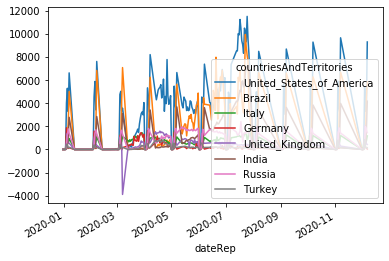

In [21]:
# plot confirmed cases vs time
data_selected.T.plot()

In [25]:
uk=data_selected.loc["United_Kingdom"]
uk

dateRep
2019-12-31       0.000000
2020-01-01       0.000000
2020-01-02       0.000000
2020-01-03       2.500000
2020-01-04     842.285714
                 ...     
2020-12-03      28.666667
2020-12-04    2076.428571
2020-12-05     869.714286
2020-12-06     490.714286
2020-12-07     435.857143
Name: United_Kingdom, Length: 210, dtype: float64

In [26]:
#lowest value in the plot
uk[uk<0]

dateRep
2020-03-07   -3891.0
Name: United_Kingdom, dtype: float64

### Let's plot cumulative confirmed case number 

In [27]:
data_selected.head()

dateRep,2019-12-31,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-13,2020-01-14,...,2020-11-05,2020-11-06,2020-11-07,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07
countriesAndTerritories,,,,,,,,,,,,,,,,,,,,,
United_States_of_America,0.0,0.0,0.333333,2.666667,4020.000000,5291.857143,3273.857143,6625.571429,0.0,0.0,...,3641.285714,3250.571429,9661.428571,0.0,0.0,185.000000,5396.428571,3298.714286,3618.714286,9299.285714
Brazil,0.0,0.0,0.000000,1.000000,202.333333,1054.000000,2402.571429,5014.571429,0.0,0.0,...,986.571429,4801.142857,6688.285714,0.0,0.0,7.000000,166.000000,848.000000,4478.714286,5853.714286
Italy,0.0,0.0,0.000000,75.333333,1160.000000,536.714286,564.428571,952.000000,0.0,0.0,...,417.000000,671.714286,1208.857143,0.0,0.0,552.500000,1157.000000,411.285714,744.285714,1172.714286
Germany,0.0,0.0,0.500000,24.500000,1874.857143,178.714286,92.714286,144.571429,0.0,0.0,...,93.857143,172.142857,159.714286,0.0,0.5,197.000000,869.571429,222.428571,114.142857,36.142857
United_Kingdom,0.0,0.0,0.000000,2.500000,842.285714,1393.571429,564.285714,542.000000,0.0,0.0,...,967.571429,437.285714,287.714286,0.0,0.0,28.666667,2076.428571,869.714286,490.714286,435.857143


In [31]:
cumulative_cases=data_selected.cumsum(axis=1)
cumulative_cases

dateRep,2019-12-31,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-13,2020-01-14,...,2020-11-05,2020-11-06,2020-11-07,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07
countriesAndTerritories,,,,,,,,,,,,,,,,,,,,,
United_States_of_America,0.0,0.0,0.333333,3.000000,4023.000000,9314.857143,12588.714286,19214.285714,19214.285714,19214.285714,...,634043.404762,637293.976190,646955.404762,646955.404762,646955.404762,647140.404762,652536.833333,655835.547619,659454.261905,668753.547619
Brazil,0.0,0.0,0.000000,1.000000,203.333333,1257.333333,3659.904762,8674.476190,8674.476190,8674.476190,...,334632.573810,339433.716667,346122.002381,346122.002381,346122.002381,346129.002381,346295.002381,347143.002381,351621.716667,357475.430952
Italy,0.0,0.0,0.000000,75.333333,1235.333333,1772.047619,2336.476190,3288.476190,3288.476190,3288.476190,...,116126.069048,116797.783333,118006.640476,118006.640476,118006.640476,118559.140476,119716.140476,120127.426190,120871.711905,122044.426190
Germany,0.0,0.0,0.500000,25.000000,1899.857143,2078.571429,2171.285714,2315.857143,2315.857143,2315.857143,...,56866.180952,57038.323810,57198.038095,57198.038095,57198.538095,57395.538095,58265.109524,58487.538095,58601.680952,58637.823810
United_Kingdom,0.0,0.0,0.000000,2.500000,844.785714,2238.357143,2802.642857,3344.642857,3344.642857,3344.642857,...,89166.428571,89603.714286,89891.428571,89891.428571,89891.428571,89920.095238,91996.523810,92866.238095,93356.952381,93792.809524
India,0.0,0.0,0.000000,0.000000,37.571429,341.000000,1593.714286,4373.285714,4373.285714,4373.285714,...,200733.035714,202242.321429,206231.035714,206231.035714,206231.035714,206241.285714,206388.571429,206917.000000,208549.000000,212727.142857
Russia,0.0,0.0,0.500000,0.750000,320.464286,1623.321429,3405.035714,4808.178571,4808.178571,4808.178571,...,156475.192857,158145.335714,159569.050000,159569.050000,159569.050000,159621.716667,160155.573810,162121.716667,163794.859524,165251.859524
Turkey,0.0,0.0,5.000000,5.000000,464.333333,843.904762,965.190476,1159.761905,1160.761905,1160.761905,...,35497.000000,35642.142857,35796.285714,35796.285714,35797.285714,35801.952381,36666.619048,36833.761905,36985.190476,37139.333333


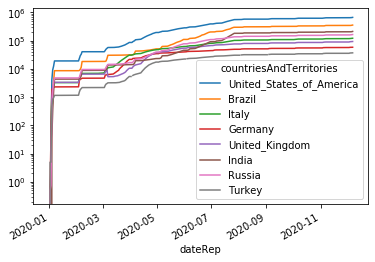

In [32]:
cumulative_cases.T.plot(logy=True)

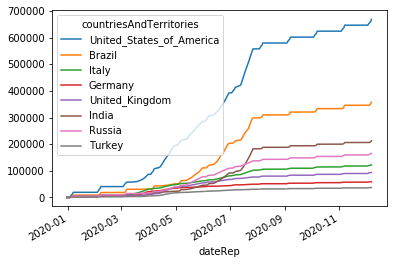

In [33]:
cumulative_cases.T.plot()

In [35]:
pd.__version__

'1.0.1'

In [36]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
1,2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546
2,2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913
3,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
4,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098


### How many countries are here? 

In [37]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
1,2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546
2,2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913
3,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
4,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098


In [38]:
# get the number of unique countriesAndTerritories
data.countriesAndTerritories.nunique()

210

In [39]:
# get the number of countryterritoryCode
data.countryterritoryCode.nunique()

209

In [40]:
# drop duplicates for countriesAndTerritories and countryterritoryCode columns
no_duplicate=data.drop_duplicates(subset=["countriesAndTerritories","countryterritoryCode"])

In [41]:
no_duplicate

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
200,2020-07-27,27,7,2020,126,4,Albania,AL,ALB,2862427.0,Europe,45.730424
341,2020-07-27,27,7,2020,593,9,Algeria,DZ,DZA,43053054.0,Africa,18.958005
546,2020-07-27,27,7,2020,0,0,Andorra,AD,AND,76177.0,Europe,55.134752
682,2020-07-27,27,7,2020,0,0,Angola,AO,AGO,31825299.0,Africa,1.175166
...,...,...,...,...,...,...,...,...,...,...,...,...
31764,2020-07-27,27,7,2020,5,0,Vietnam,VN,VNM,96462108.0,Asia,0.049760
31970,2020-07-27,27,7,2020,0,0,Western_Sahara,EH,ESH,582458.0,Africa,42.406491
32063,2020-07-27,27,7,2020,7,5,Yemen,YE,YEM,29161922.0,Asia,0.740692
32172,2020-07-27,27,7,2020,153,9,Zambia,ZM,ZMB,17861034.0,Africa,14.478445


### select only two columns:  countriesAndTerritories and countryterritoryCode

In [47]:
pd.options.display.max_rows=999

In [48]:
no_duplicate_small=no_duplicate[["countriesAndTerritories","countryterritoryCode"]]

In [49]:
no_duplicate_small

,countriesAndTerritories,countryterritoryCode
0,Afghanistan,AFG
200,Albania,ALB
341,Algeria,DZA
546,Andorra,AND
682,Angola,AGO
810,Anguilla,AIA
933,Antigua_and_Barbuda,ATG
1063,Argentina,ARG
1206,Armenia,ARM
1407,Aruba,ABW


- let's check if one code is used more than once

In [46]:
no_duplicate_small.countryterritoryCode.value_counts()

FIN        1
PRT        1
AGO        1
AND        1
GRC        1
SLV        1
GHA        1
TUN        1
BIH        1
BLZ        1
AUT        1
LAO        1
XKX        1
NGA        1
ATG        1
BHR        1
MDV        1
CNG1925    1
OMN        1
KAZ        1
IRQ        1
PER        1
NZL        1
ABW        1
BTN        1
ARG        1
GAB        1
IDN        1
CAN        1
BWA        1
NER        1
DOM        1
SLE        1
SMR        1
PSE        1
SXM        1
DEU        1
PAK        1
MMR        1
BES        1
CUB        1
MYS        1
ESP        1
PRY        1
IRL        1
SRB        1
PYF        1
RUS        1
PHL        1
CMR        1
SVN        1
QAT        1
FLK        1
SYC        1
HND        1
KEN        1
CHN        1
TCD        1
LUX        1
ITA        1
HTI        1
BMU        1
BEN        1
COD        1
ECU        1
GEO        1
BGR        1
GUM        1
URY        1
NIC        1
ZAF        1
ESH        1
MKD        1
CHL        1
CPV        1
BRN        1
CYP        1

- It seems one country does not have a code, let's find that country
- we need to find the row where we see countryterritoryCode as NaN

In [55]:
no_duplicate_small.countryterritoryCode.isna()

0        False
200      False
341      False
546      False
682      False
810      False
933      False
1063     False
1206     False
1407     False
1534     False
1744     False
1954     False
2157     False
2289     False
2498     False
2633     False
2765     False
2967     False
3177     False
3303     False
3436     False
3566     False
3702     False
3839     False
3956     False
4093     False
4211     False
4421     False
4544     False
4683     False
4823     False
4960     False
5078     False
5279     False
5416     False
5626     False
5755      True
5819     False
5949     False
6083     False
6213     False
6358     False
6568     False
6707     False
6794     False
6928     False
7070     False
7206     False
7413     False
7548     False
7674     False
7812     False
8022     False
8159     False
8369     False
8500     False
8627     False
8828     False
9033     False
9239     False
9370     False
9505     False
9633     False
9838     False
9973     False
10109    F

In [54]:
no_duplicate_small[no_duplicate_small.countryterritoryCode.isna()]

,countriesAndTerritories,countryterritoryCode
5755,Cases_on_an_international_conveyance_Japan,NaN


In [53]:
no_duplicate_small

,countriesAndTerritories,countryterritoryCode
0,Afghanistan,AFG
200,Albania,ALB
341,Algeria,DZA
546,Andorra,AND
682,Angola,AGO
810,Anguilla,AIA
933,Antigua_and_Barbuda,ATG
1063,Argentina,ARG
1206,Armenia,ARM
1407,Aruba,ABW


### Let's play with columns

In [56]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
1,2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546
2,2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913
3,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
4,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098


In [63]:
# delete popData2019 and Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 column
data_new=data.drop(columns=["popData2019",
                            "Cumulative_number_for_14_days_of_COVID"]
                   ,inplace=True)

KeyError: "['Cumulative_number_for_14_days_of_COVID'] not found in axis"

In [62]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
1,2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546
2,2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913
3,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
4,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098


### read population data using world_population.csv file

In [64]:
pop=pd.read_csv("world_population.csv",skiprows=4)

In [65]:
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [70]:
# extract only Country Name and 2019 columns
pop_19=pop[["2019","Country Name"]]


In [71]:
pop_19

,2019,Country Name
0,1.063140e+05,Aruba
1,3.804175e+07,Afghanistan
2,3.182530e+07,Angola
3,2.854191e+06,Albania
4,7.714200e+04,Andorra
5,4.278703e+08,Arab World
6,9.770529e+06,United Arab Emirates
7,4.493871e+07,Argentina
8,2.957731e+06,Armenia
9,5.531200e+04,American Samoa


In [72]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
1,2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546
2,2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913
3,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
4,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098


In [73]:
# now add population information into data_new data frame
data_pop=pd.merge(data,pop_19,left_on="countriesAndTerritories",right_on="Country Name")

In [74]:
data_pop.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,2019,Country Name
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187,38041754.0,Afghanistan
1,2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546,38041754.0,Afghanistan
2,2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913,38041754.0,Afghanistan
3,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955,38041754.0,Afghanistan
4,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098,38041754.0,Afghanistan


In [77]:
# rename 2019 column as population
data_pop.rename({"2019":"pop"},axis=1)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,pop,Country Name
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187,38041754.0,Afghanistan
1,2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546,38041754.0,Afghanistan
2,2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913,38041754.0,Afghanistan
3,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955,38041754.0,Afghanistan
4,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098,38041754.0,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22516,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,14645468.0,Zimbabwe
22517,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,14645468.0,Zimbabwe
22518,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,14645468.0,Zimbabwe
22519,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,14645468.0,Zimbabwe


In [78]:
data_pop.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,2019,Country Name
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187,38041754.0,Afghanistan
1,2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546,38041754.0,Afghanistan
2,2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913,38041754.0,Afghanistan
3,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955,38041754.0,Afghanistan
4,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098,38041754.0,Afghanistan


In [80]:
data_pop.to_csv("test.csv")